# **Workshop 2: Signal Analysis in Frequency Domain**

In [19]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft
from scipy import signal

## 2.1 Fourier Series Approximation

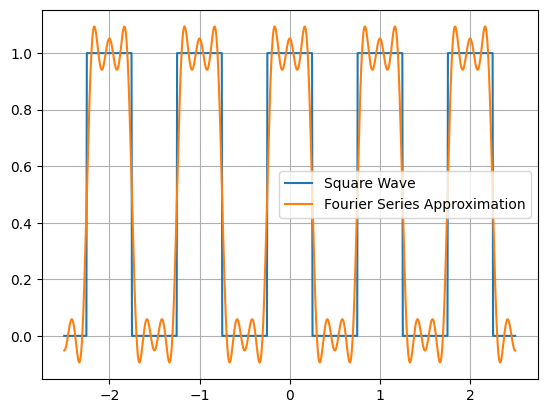

In [20]:
# Square pulse
def square(t):
    if t % 1 < 0.25 or t % 1 > 0.75:
        s = 1
    elif t % 1 == 0.25 or t % 1 == 0.75:
        s = 0.5
    else:
        s = 0
    return s


# Fourier series coefficients
def a(k):
    if k == 0:
        a_k = 0.5
    else:
        a_k = 1 * np.sin(k * np.pi/2) / (k * np.pi)
    return a_k

def fs_approx(t, N):
    x_t = 0
    for k in range(-N, N+1):
        if k == 0 or k%2 == 1:
            a_k = a(k)
            omega = 2*np.pi
            x_t += a_k * np.e**(1j * k * omega * t)
    return x_t.real


# Fourier series approximation of the square wave
x = []
y = []
N = 5 # CHANGE HERE
time = np.linspace(-2.5,2.5,1000)
for t in time:
    x.append(square(t))
    y.append(fs_approx(t,N).real)


fig, ax = plt.subplots()
ax.plot(time, x, label='Square Wave')
ax.plot(time, y, label='Fourier Series Approximation')
ax.grid(True)
ax.legend()
plt.show()

## **2.2 Fourier Series Coefficients**

<StemContainer object of 3 artists>

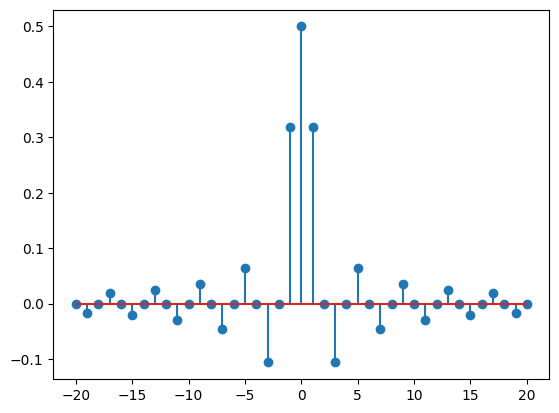

In [21]:
k = [i for i in range(-20,21)]
a_k = [a(j) for j in k]
plt.stem(k,a_k)

(-20.0, 20.0)

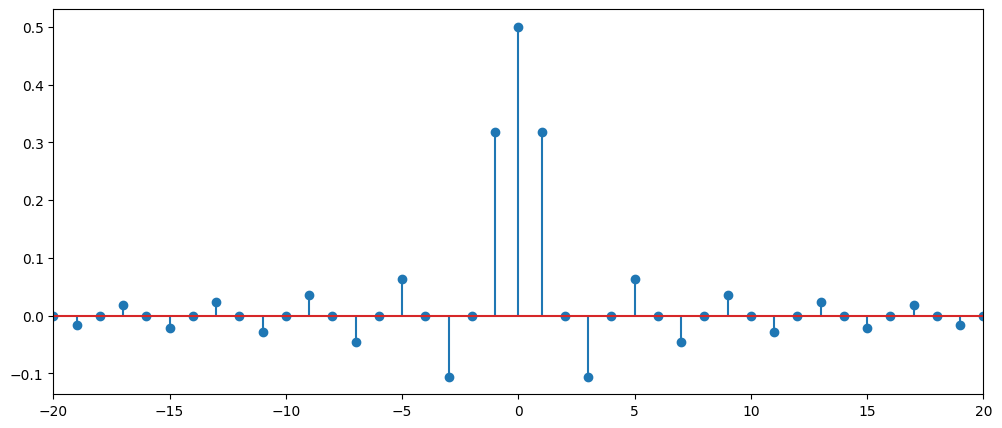

In [22]:
N = 200
t = np.linspace(0, 1-1/N, N)
x = []
for i in t:
    x.append(square(i))
    # Obtaining FFT coefficients
    X = fftshift(fft(x))
    X_norm = X.real/N
    k = np.linspace(-N/2, N/2-1, N)
# plotting fft coefficients
fig,ax=plt.subplots(figsize=(12,5))
ax.stem(k,X_norm)
ax.set_xlim(-20,20)

# **2.3 Ideal Filters and Actual Filters**

In [23]:
# Creating 3 sinusoidal signals
# Your code goes here
w1 = 100 * np.pi
w2 = 400 * np.pi
w3 = 800 * np.pi
a1 = 0.75
a2 = 1
a3 = 0.5
fs = 4095
ws = 2*np.pi*fs


def x(t):
    x_t = a1*np.sin(w1*t) + a2*np.sin(w2*t) + a3*np.sin(w3*t)
    return x_t

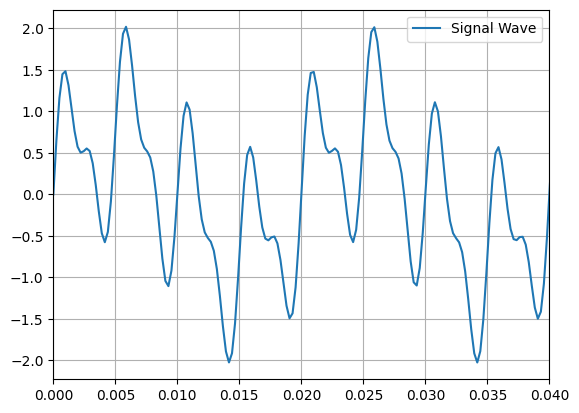

In [24]:
time = np.linspace(0,1,fs+1)
xt = [x(t_) for t_ in time]

# Plotting the input signal in time domain
fig, ax = plt.subplots()
ax.plot(time, xt, label='Signal Wave')
ax.grid(True)
ax.legend()
ax.set_xlim(0,0.04)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


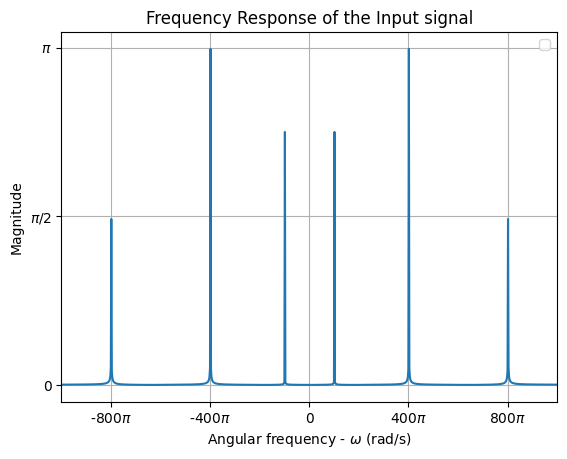

In [35]:
Xw = fft(xt, 4096)*2*np.pi/fs
Xw = fftshift(Xw)
k = np.arange(1,4097)
w = k/4096*ws - ws/2
# Plotting the input signal in frequency domain
fig, ax = plt.subplots()


# Your code goes here
ax.plot(w,abs(Xw))

ax.set_title('Frequency Response of the Input signal')
ax.set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')
ax.set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,400*np.pi))
ax.set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,400)])
ax.set_xlim(-1000*np.pi, 1000*np.pi)
ax.set_yticks([0,np.pi/2,np.pi])
ax.set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
plt.grid()


In [26]:
# Ideal filter
wc1 = (w1+w2)/2
wc2 = (w2+w3)/2
def ideal_filter(w):
    # Your code goes here
    gain = 1
    if abs(w) <= wc1 or abs(w) >= wc2:
        gain = 0
    return gain

# **2.3.1 Ideal Filter: Part A**

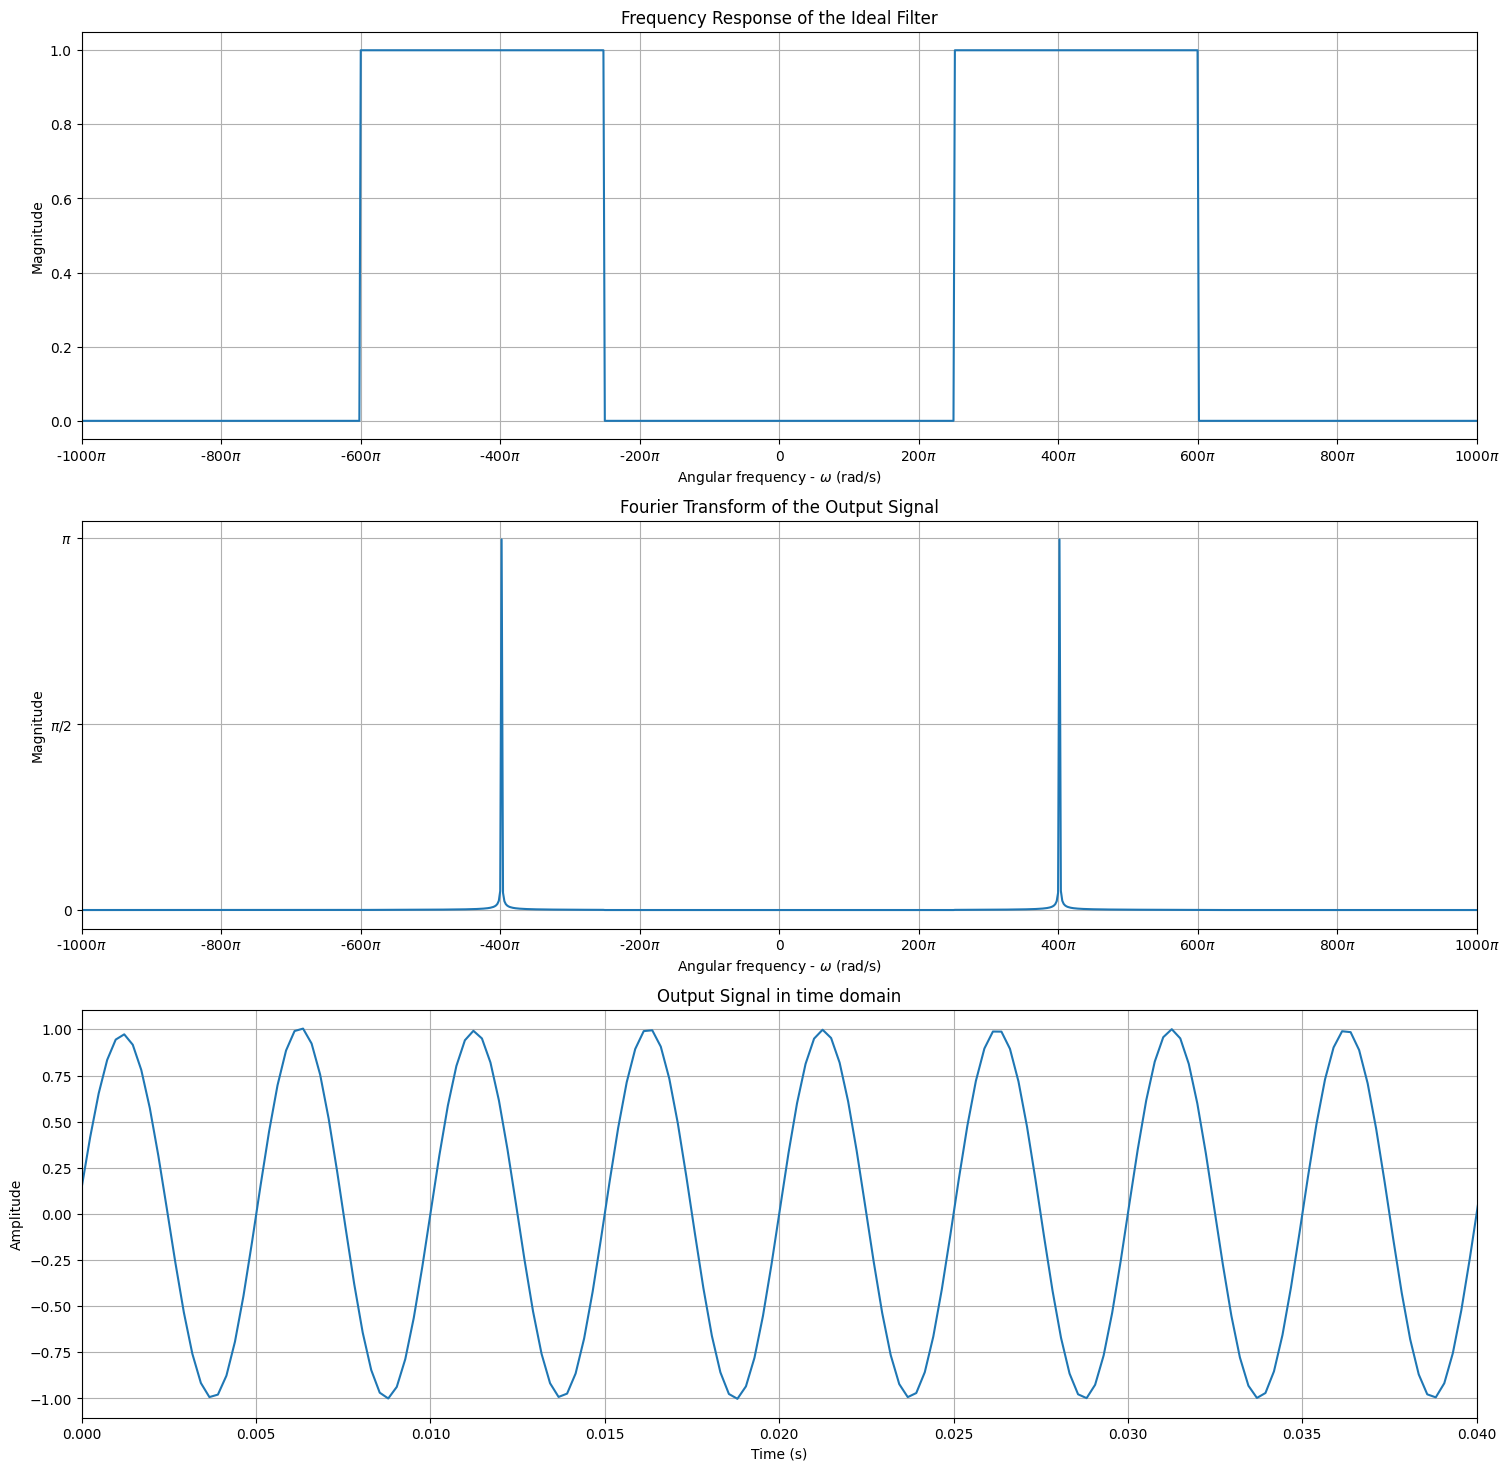

In [27]:
k = np.arange(1,4097)
w = k/4096*ws - ws/2
H0w = [ideal_filter(i) for i in w]
# Simulation of Filtering
Y0w = np.multiply(Xw,H0w)
# Obtaining the time domain signal
y0t = ifft(fftshift(Y0w*fs/(2*np.pi)))
# Ideal filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(w,H0w)
axes[0].set_title('Frequency Response of the Ideal Filter')
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the ideal filter output (magnitude)
axes[1].plot(w,abs(Y0w))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# Output signal in time domain
axes[2].plot(time,np.real(y0t))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

# **2.3.2 Ideal Filter: Part B**

In [28]:
# Actual Filter
b, a = signal.butter(5, [2*wc1/ws, 2*wc2/ws], 'bandpass', analog=False)
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)*ws/(2*np.pi)
h = np.append(np.flipud(h), h)
# Filtering
y = signal.lfilter(b,a,xt)
# Obtaining the frequency response of the output signal
Y = fft(y,4096)*2*np.pi/fs
Y = fftshift(Y)

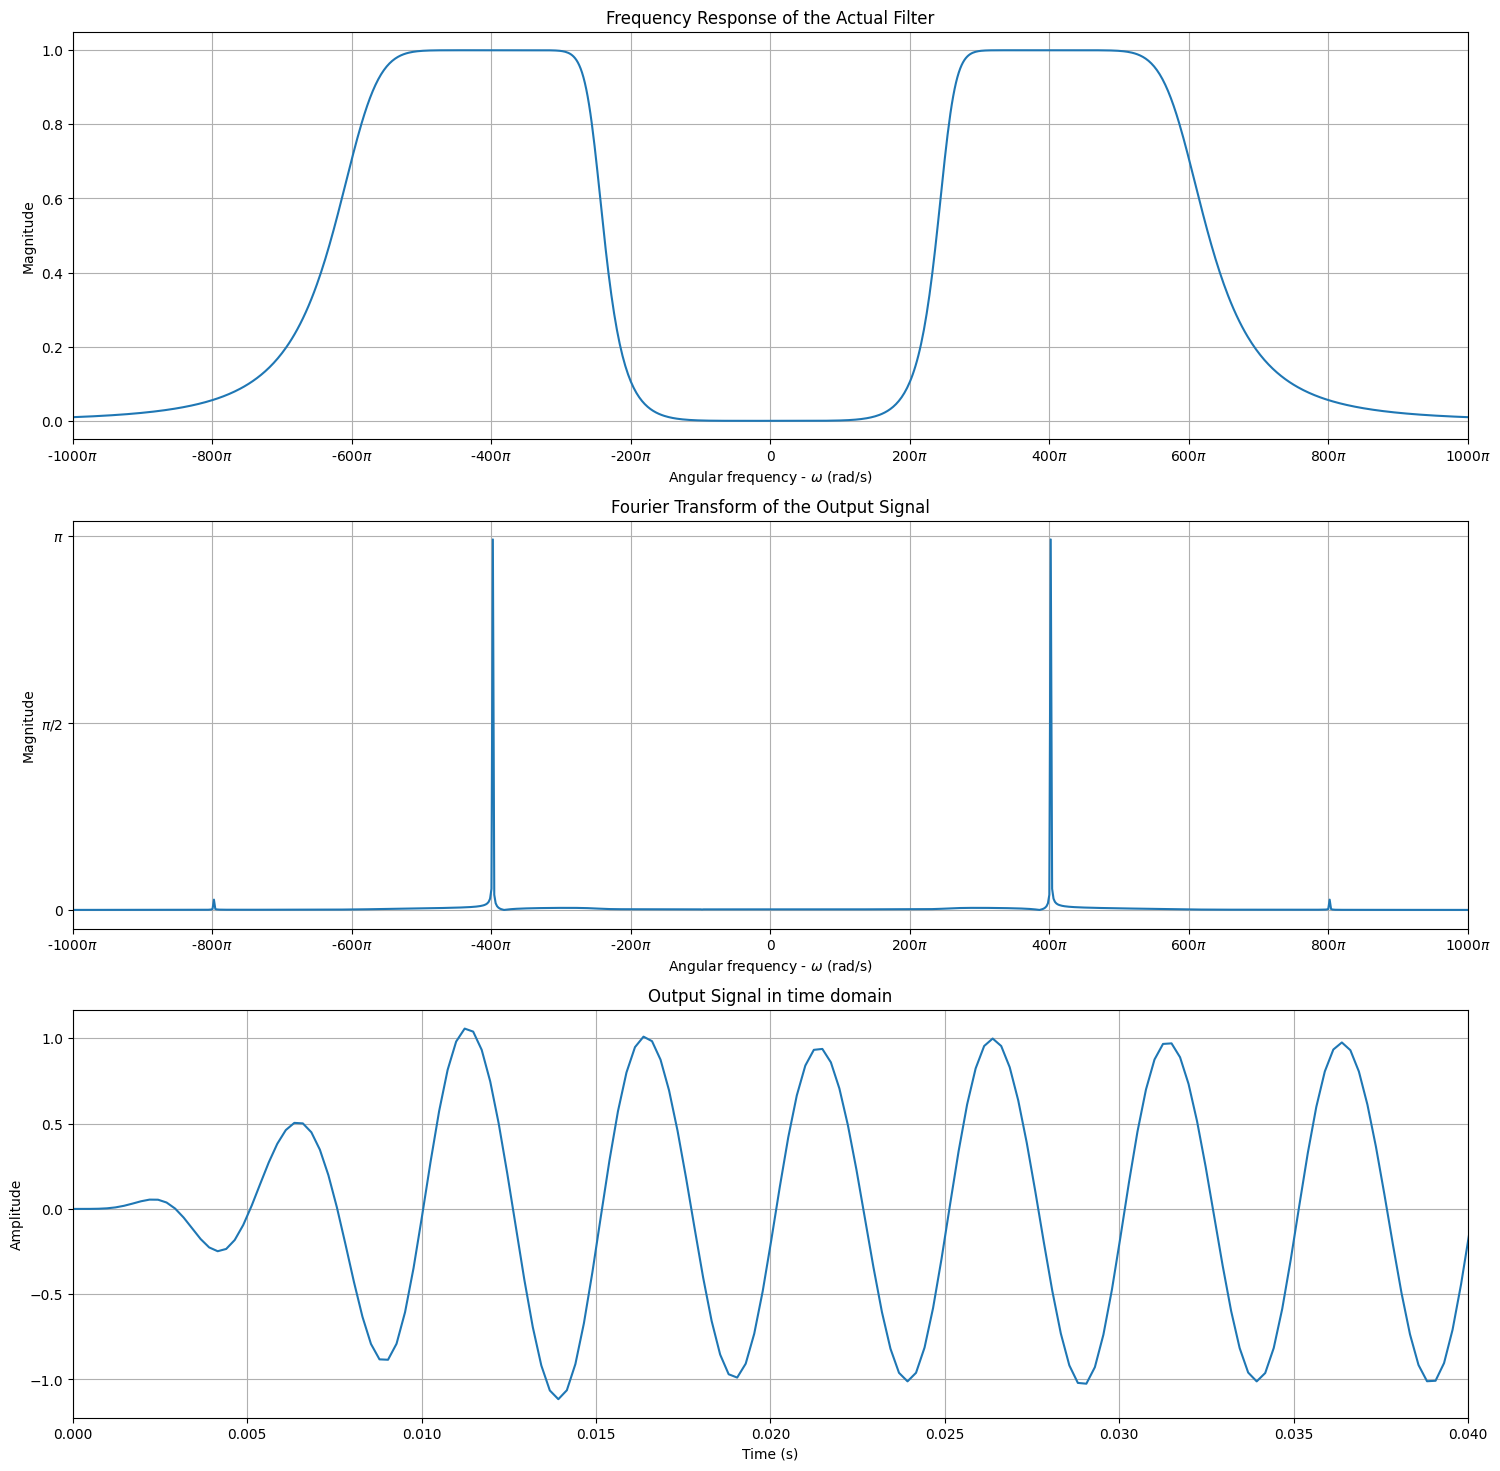

In [29]:
# Actual filter frequency response (magnitude)
fig, axes = plt.subplots(3,1, figsize=(18,18))
axes[0].plot(ww, abs(h) )
axes[0].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[0].set_ylabel('Magnitude')
axes[0].set_title('Frequency Response of the Actual Filter')
axes[0].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[0].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[0].set_xlim(-1000*np.pi, 1000*np.pi)
axes[0].grid()
# Frequency response of the actual filter output (magnitude)
axes[1].plot(w,abs(Y))
axes[1].set_title('Fourier Transform of the Output Signal')
axes[1].set_xlabel('Angular frequency -'+r' $\omega$ (rad/s)')
axes[1].set_ylabel('Magnitude')
axes[1].set_xticks(np.arange(-1200*np.pi, 1200*np.pi+1,200*np.pi))
axes[1].set_xticklabels([str(i)+(r'$\pi$' if i else '') for i in range(-1200,1210,200)])
axes[1].set_xlim(-1000*np.pi, 1000*np.pi)
axes[1].set_yticks([0,np.pi/2,np.pi])
axes[1].set_yticklabels([0,r'$\pi$/2',r'$\pi$'])
axes[1].grid()
# # Output signal in time domain
axes[2].plot(time,np.real(y))
axes[2].set_title('Output Signal in time domain')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].set_xlim(0, 0.04)
axes[2].grid()

# **2.4 Removing Power Line Noise in an ECG Signal**

#### task 1

In [30]:
import csv

# Reading the ECG data
ecg = []

with open('ecg_signal.csv') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        ecg.append(float(row[0]))

duration = 10 # seconds
T = duration/len(ecg)
Fs = 1/T
# Obtaining the fourier transform
F = fftshift(fft(ecg))
fr = np.linspace(-Fs/2, Fs/2, len(F))

#### task 2

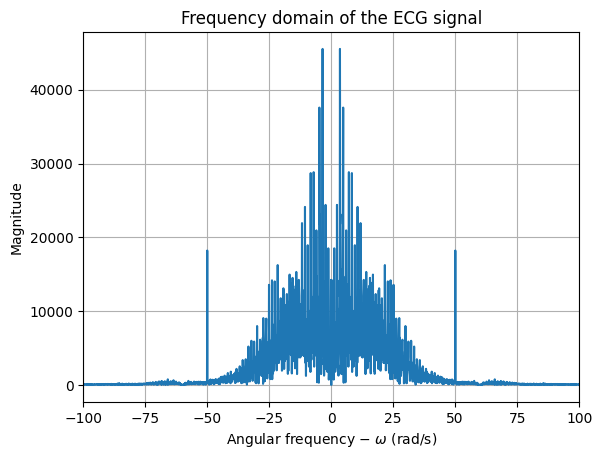

In [31]:
fig, ax = plt.subplots()
ax.plot(fr,np.abs(F))
ax.set_xlim(-100, 100)
ax.set_title('Frequency domain of the ECG signal')
ax.set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')

plt.grid()

#### task 4

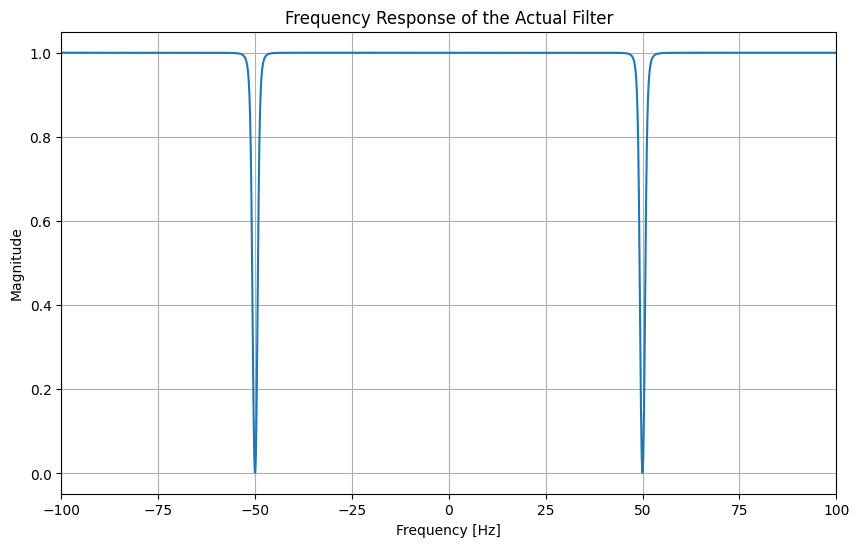

In [32]:
# Designing the filter
f1 = 49
f2 = 51
filter_type = 'bandstop'
b, a = signal.butter(2, [2*f1/Fs, 2*f2/Fs], filter_type , analog=False)
# Obtaining the frequency response of the filter
ww, h = signal.freqz(b, a, 2047)
ww = np.append(-np.flipud(ww), ww)
h = np.append(np.flipud(h), h)
# Plotting the frequency response
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ww*Fs/(2*np.pi), abs(h) )
ax.set_title('Frequency Response of the Actual Filter')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Magnitude')
ax.set_xlim(-100,100)
ax.grid()

#### task 5

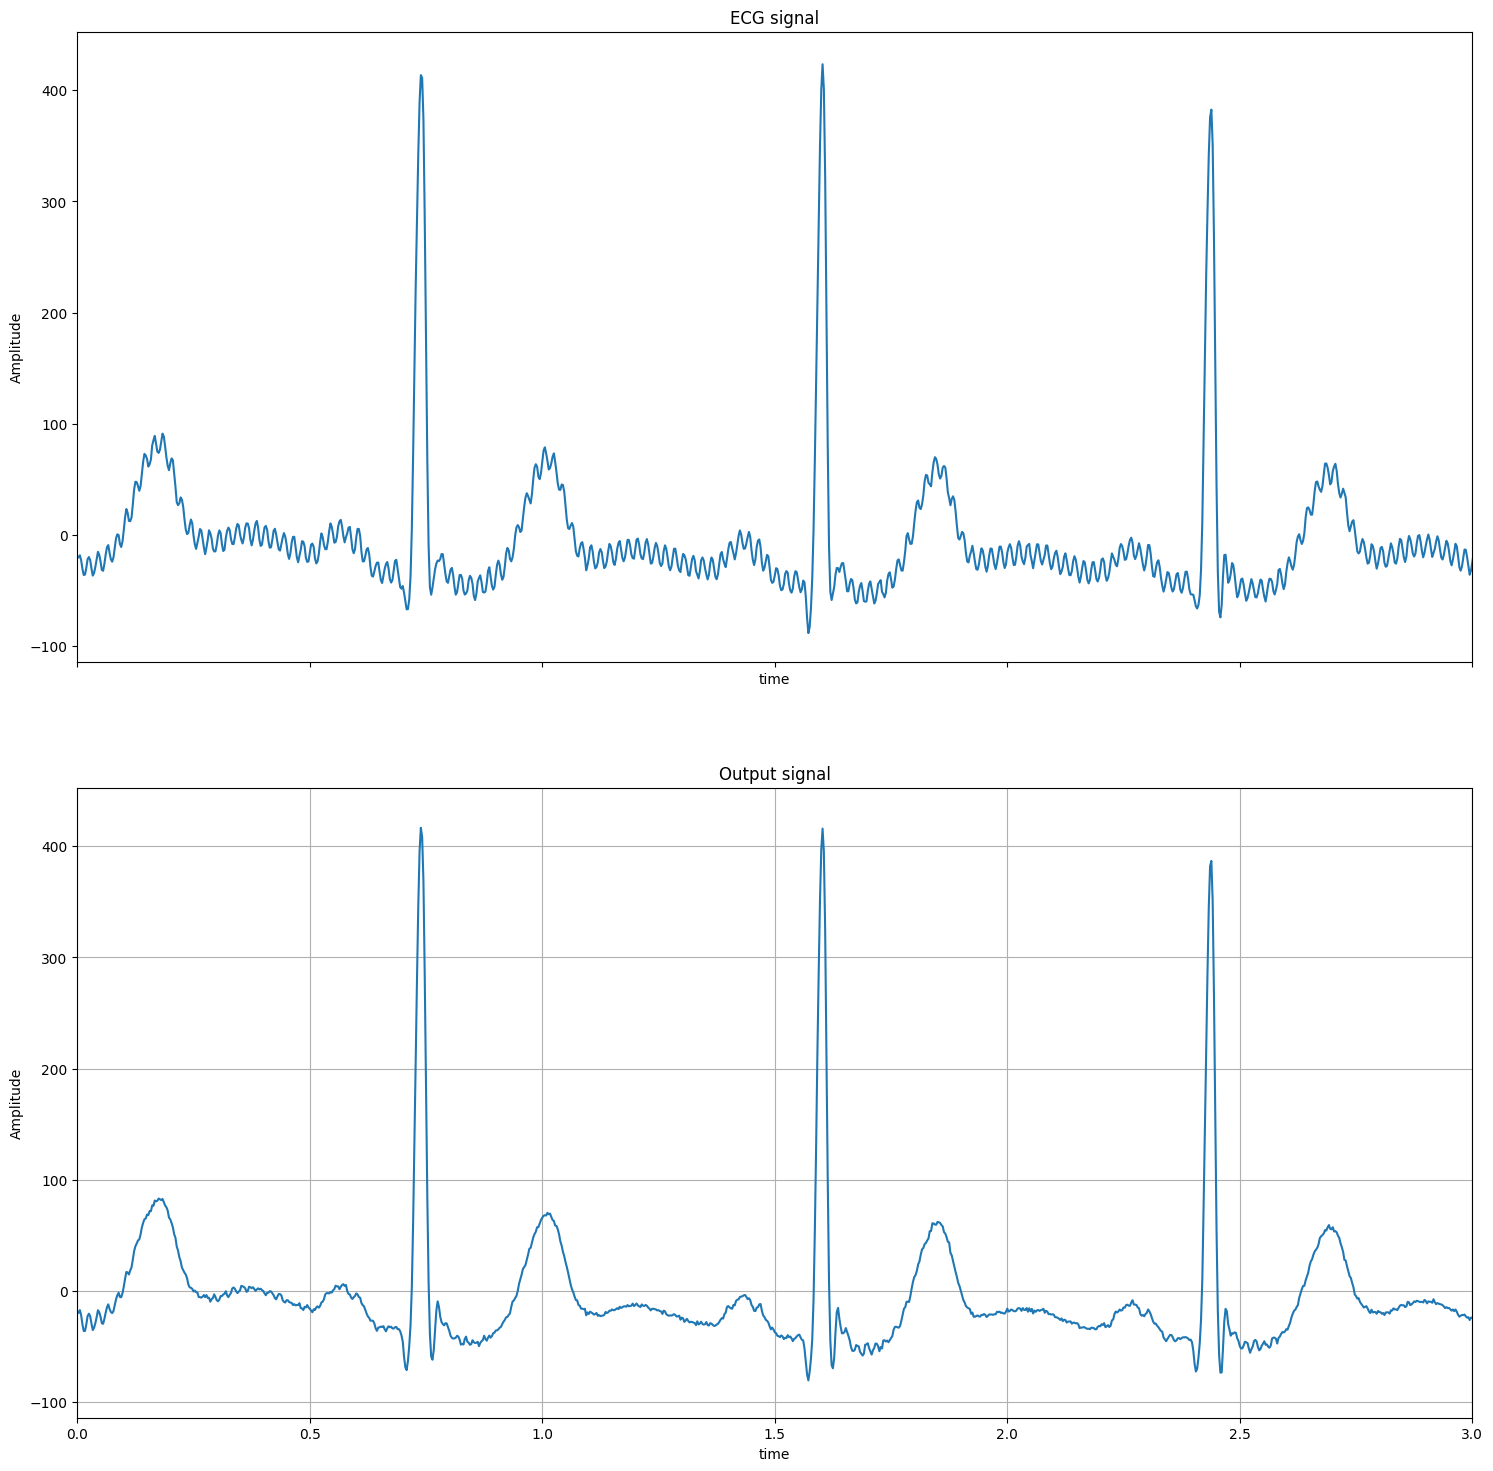

In [33]:
time = np.arange(T, duration+T, T)
# Filtering the ECG wavefoem
output = signal.lfilter(b, a, ecg)

fig,axes = plt.subplots(2,1, sharex='all', sharey='all', figsize = (18,18))
axes[0].plot(time,ecg)
axes[0].set_xlim(0,3)
axes[0].set_title('ECG signal')
axes[0].set_xlabel('time')
axes[0].set_ylabel('Amplitude')

axes[1].plot(time,output)
axes[1].set_xlim(0,3)
axes[1].set_title('Output signal')
axes[1].set_xlabel('time')
axes[1].set_ylabel('Amplitude')

plt.grid()

#### task 6

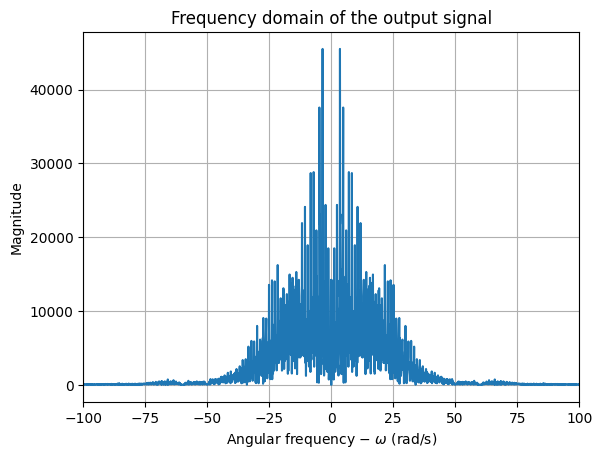

In [34]:
F = fftshift(fft(output))
fig, ax = plt.subplots()
ax.plot(fr,np.abs(F))
ax.set_xlim(-100, 100)
ax.set_title('Frequency domain of the output signal')
ax.set_xlabel('Angular frequency −'+r' $\omega$ (rad/s)')
ax.set_ylabel('Magnitude')

plt.grid()